In [1]:
%load_ext autoreload
%autoreload 2

import laspy
import matplotlib.pyplot as plt
import numpy as np
import os
os.chdir("../")
from utils import distance_along_profile_proj_crs


In [2]:
ptcl = laspy.read("Pointclouds/Cropped_CableMnt_RA_2019_Pointcloud.laz")

In [3]:
### Define the color scheme
def norm_colors(x):
    "Convert 16-bit colors for plotting"
    nor = (x/x.max()) # *255
    # nor = (x.max()-x)/(x.max()-x.min())
    return nor
r = norm_colors(ptcl.red)
g = norm_colors(ptcl.green)
b = norm_colors(ptcl.blue)
rgb = np.stack([r,g,b],axis=1)

In [11]:
prf_d = distance_along_profile_proj_crs(-80e3,-90e3,50e3,350e3,100)

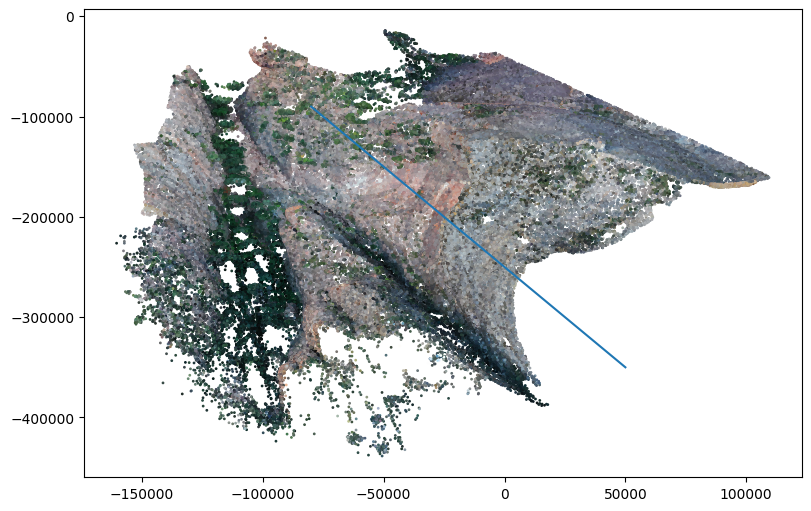

In [9]:
dcm = 100 # Decimation value
fig = plt.figure(figsize=(8,5), constrained_layout=True)
ax = fig.add_subplot()
ax.scatter(ptcl.X[::dcm],ptcl.Y[::dcm],c=rgb[::dcm],s=1)
ax.plot([-80e3,50e3],[-90e3,-350e3])
plt.show()

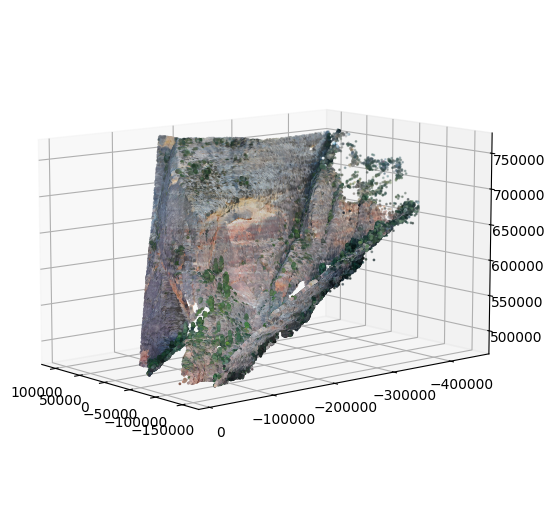

In [10]:
fig = plt.figure(figsize=(8,5), constrained_layout=True)
ax = fig.add_subplot(projection='3d')
ax.scatter(ptcl.X[::dcm],ptcl.Y[::dcm],ptcl.Z[::dcm],c=rgb[::dcm],s=1)
ax.view_init(elev=10., azim=140)
ax.margins(z=0.01)
# Set box aspect ratio to be non-equal
ax.set_box_aspect([1, 1.5, 0.9])
# fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.show()